In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv(r"X:\BIA\Lectures\Housing.csv")

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Cleaning of dataset
* Firstly we will start with cleaning of dataset.
* Initially we will check the null values.

In [4]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## Creating dumies for the columns containing 'YES' 'NO'
* function:
##### pd.get_dumies(data, columns)

In [5]:
df_dummies= pd.get_dummies(df, columns=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'])

#### Now we got True false for the yes, no values. Now we will convert them into 1 and 2.

In [6]:
df_dummies= df_dummies * 1

In [7]:
df_dummies

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,0,1,1,0,...,0,1,0,0,1,0,1,1,0,0
1,12250000,8960,4,4,4,3,0,1,1,0,...,0,1,0,0,1,1,0,1,0,0
2,12250000,9960,3,2,2,2,0,1,1,0,...,1,1,0,1,0,0,1,0,1,0
3,12215000,7500,4,2,2,3,0,1,1,0,...,1,1,0,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,0,1,0,1,...,1,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,0,1,1,0,...,1,1,0,1,0,1,0,0,0,1
541,1767150,2400,3,1,1,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
542,1750000,3620,2,1,1,0,0,1,1,0,...,0,1,0,1,0,1,0,0,0,1
543,1750000,2910,3,1,1,0,1,0,1,0,...,0,1,0,1,0,1,0,1,0,0


#### Now we get 1 and 0 for True and False. 
* So now we can move with our task.
### Now we will split our data into features and target. Initially we will defile the area as Feature and Price to be the target.

In [8]:
# Let x be the feature (input)
# Make sure to make it array for the ease in calculation.
x= np.array(df['area']).reshape(-1,1) 
y= np.array(df['price']).reshape(-1,1)

#### To split the features and target data, we need to import:
* from sklearn.model_selection import train_test_split # use to split the data.

In [9]:
from sklearn.model_selection import train_test_split

#### x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state= 42 )
* This is the formula we use to split the target and features of data. Here we use random_state= 42 in order to ensure that our data remains same after multiple execuation.
* test_size= 0.2 ensures that our target data is 20 % of the total data and 80% is feature data which we are going to train.

In [10]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state= 42 )

In [11]:
x_train

array([[ 6000],
       [ 7200],
       [ 3816],
       [ 2610],
       [ 3750],
       [ 5010],
       [ 3850],
       [ 5076],
       [ 3180],
       [ 6020],
       [ 3120],
       [ 7700],
       [ 7000],
       [ 3570],
       [ 3000],
       [ 6450],
       [ 2400],
       [ 5300],
       [ 7424],
       [12090],
       [ 7260],
       [ 3000],
       [ 5200],
       [ 8400],
       [ 6525],
       [ 3650],
       [ 3635],
       [ 4000],
       [ 4600],
       [ 5640],
       [ 3520],
       [ 1836],
       [ 3150],
       [ 5680],
       [ 2145],
       [ 8100],
       [ 3930],
       [ 6420],
       [ 4130],
       [11440],
       [ 9667],
       [10360],
       [ 5960],
       [ 2880],
       [ 6360],
       [ 3480],
       [ 8100],
       [ 6540],
       [ 2787],
       [ 6480],
       [ 3600],
       [ 3185],
       [ 4410],
       [ 9000],
       [ 3650],
       [ 7160],
       [ 3584],
       [ 4280],
       [ 7000],
       [ 9620],
       [ 9166],
       [ 2160],
       [

#### Now we will train the data and then predict the data.
* For this we need to use linear regression, and to use it we need to import it from sklearn.

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model= LinearRegression()

In [14]:
model.fit(x_train,y_train) # Training the data

LinearRegression()

In [15]:
y_pred= model.predict(x_test)

### Predicted Prices

### Actual Prices

In [17]:
y_test

array([[ 4060000],
       [ 6650000],
       [ 3710000],
       [ 6440000],
       [ 2800000],
       [ 4900000],
       [ 5250000],
       [ 4543000],
       [ 2450000],
       [ 3353000],
       [10150000],
       [ 2660000],
       [ 3360000],
       [ 3360000],
       [ 2275000],
       [ 2660000],
       [ 2660000],
       [ 7350000],
       [ 2940000],
       [ 2870000],
       [ 6720000],
       [ 5425000],
       [ 1890000],
       [ 5250000],
       [ 4193000],
       [12250000],
       [ 3080000],
       [ 5110000],
       [ 9800000],
       [ 2520000],
       [ 6790000],
       [ 3500000],
       [ 6650000],
       [ 2940000],
       [ 3325000],
       [ 4200000],
       [ 4900000],
       [ 3290000],
       [ 3500000],
       [ 2380000],
       [ 5495000],
       [ 3675000],
       [ 6650000],
       [ 4907000],
       [ 3150000],
       [ 4480000],
       [ 6580000],
       [ 5740000],
       [ 3003000],
       [ 1820000],
       [ 8400000],
       [ 2450000],
       [ 427

##### From predicted and actual prices we can see the difference betweeen the prices.
Now we will check our model, either it is a good model we get or not. 

* For this we need to find out some caluclations:
###### 1. MAE
* metrics.mean_absolute_error(y_test, y_pred)
###### 2. MSE 
It is actually the cost function, MSE will tell about the predicted and actual values difference.
* metrics.mean_absolute_error(y_test, y_pred)

##### 3. RMSE
RMSE has same formula of MSE, here we take Square root to keep them in same unit.
* metrics.mean_squared_error(y_test, y_pred)

##### 4. r2 (r square score)
metrics.r2_score(y_test, y_pred)

* And to do all this we need to import metrics from sklearn

In [18]:
from sklearn import metrics

In [19]:
mae= metrics.mean_absolute_error(y_test, y_pred)
mae

1474748.1337969352

In [20]:
mse= metrics.mean_squared_error(y_test, y_pred)
mse

3675286604768.185

In [21]:
rmse= np.sqrt(mse)
rmse

1917103.7021424233

### First thing is for checking the accuracy of the model is to compare the mae and rmse values, if the difference between them is higher so our model is not good.
* Next is to check the r2 score.

In [22]:
r2= metrics.r2_score(y_test, y_pred)
r2

0.27287851871974644

#### AS r2 score is way less than 1 so we can say that our model is not good.

##### Now predicting price with more than one variable.

In [23]:
# Let x1 be features and y1 be targets.
x1= df_dummies[['area','mainroad_no','mainroad_yes','guestroom_yes','guestroom_no']] # Features
y1= df_dummies[['price']] # Target

##### Spliting target and features

In [24]:
x1_train, x1_test, y1_train, y1_test= train_test_split(x1,y1, test_size= 0.2, random_state= 42)

In [25]:
model= LinearRegression()

In [26]:
model.fit(x1_train,y1_train)

LinearRegression()

In [27]:
y1_pred= model.predict(x1_test)
y1_pred

array([[4185570.10454993],
       [5171861.76193312],
       [4269373.34622702],
       [4621563.94747818],
       [4240024.12945609],
       [5252572.10805318],
       [5912929.4853991 ],
       [5385726.650699  ],
       [3977540.00223369],
       [3011601.43371273],
       [5934941.3979773 ],
       [4230485.63400554],
       [3385803.94754209],
       [3158347.51756738],
       [4243692.78155246],
       [4120617.43399198],
       [3520968.3185683 ],
       [4988429.15711481],
       [4933399.37566931],
       [4988429.15711481],
       [4628901.25167091],
       [6058924.31038221],
       [4125929.0492591 ],
       [4949157.05123141],
       [5813875.87879721],
       [6441215.38727584],
       [4688682.75238941],
       [4655664.88352211],
       [7629858.66649851],
       [3887833.52820493],
       [4254698.73784155],
       [3931857.35336132],
       [5756260.51243199],
       [5214051.26104133],
       [4539019.27530994],
       [4474817.86362353],
       [5259525.018584  ],
 

In [28]:
y1_test

,price
316,4060000
77,6650000
360,3710000
90,6440000
493,2800000
...,...
15,9100000
357,3773000
39,7910000
54,7350000


#### Checking the quality of results

In [29]:
mae= metrics.mean_absolute_error(y1_test,y1_pred)
mae

1404978.9203067846

In [30]:
mse= metrics.mean_squared_error(y1_test,y1_pred)
mse

3405982158397.5264

In [31]:
rmse= np.sqrt(mse)
rmse

1845530.3190133525

In [32]:
r2= metrics.r2_score(y1_test,y1_pred)
r2

0.32615791404808525

### Still our model is not good.
#### Now using all of the variables to predict the score.

In [33]:
df_dummies.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_no', 'mainroad_yes', 'guestroom_no', 'guestroom_yes',
       'basement_no', 'basement_yes', 'hotwaterheating_no',
       'hotwaterheating_yes', 'airconditioning_no', 'airconditioning_yes',
       'prefarea_no', 'prefarea_yes', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [34]:
# Let x2 be features and y2 be targets.

x2= df_dummies[['area', 'bedrooms', 'bathrooms', 'stories', 'parking','mainroad_no', 'mainroad_yes', 'guestroom_no', 'guestroom_yes','basement_no', 'basement_yes', 'hotwaterheating_no','hotwaterheating_yes', 'airconditioning_no', 'airconditioning_yes','prefarea_no', 'prefarea_yes', 'furnishingstatus_furnished','furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']]
y2= df_dummies[['price']]                

In [35]:
x2_train, x2_test, y2_train, y2_test= train_test_split(x2,y2, test_size= 0.2, random_state= 42)

In [36]:
model= LinearRegression()

In [37]:
model.fit(x2,y2)

LinearRegression()

In [38]:
y2_predict= model.predict(x2_test)

In [39]:
y2_predict

array([[5035356.15327146],
       [7239695.3082938 ],
       [3072114.01371605],
       [4737081.69889813],
       [3213715.04297896],
       [3476305.36293184],
       [5746163.15837995],
       [6320658.84480388],
       [2668273.11077411],
       [2484826.82755094],
       [9808678.48477315],
       [2681345.47259405],
       [3072785.36652376],
       [3337092.86907488],
       [3605876.9576797 ],
       [5027352.1476937 ],
       [3024917.66858071],
       [4893438.42033484],
       [4341966.10521277],
       [3550627.2108087 ],
       [5930314.52602745],
       [6033964.63962031],
       [2611765.7475066 ],
       [4793550.02285478],
       [5396156.59826746],
       [7626587.75745808],
       [3125924.59435295],
       [5068490.1060754 ],
       [8341234.19298998],
       [3315401.67483243],
       [6482261.12391156],
       [3325358.67655471],
       [6766607.67493102],
       [4266408.49640954],
       [3567089.81967699],
       [5904201.15301761],
       [4990545.01129703],
 

In [40]:
y2_test

,price
316,4060000
77,6650000
360,3710000
90,6440000
493,2800000
...,...
15,9100000
357,3773000
39,7910000
54,7350000


#### Checking the model

In [41]:
mae= metrics.mean_absolute_error(y2_test,y2_predict)
mae

928415.8721613694

In [42]:
mse= metrics.mean_squared_error(y2_test,y2_predict)
mse

1624793653639.3967

In [43]:
rmse= np.sqrt(mse)
rmse

1274673.9401271984

In [44]:
r2= metrics.r2_score(y2_test,y2_predict)
r2

0.6785495948326048

#### Here we got r2 score better than the previous ones but still we can't say that our model is good.
#### Also there is a huge difference between MAE and MSE, which also shows that model is not good.

# Visualization

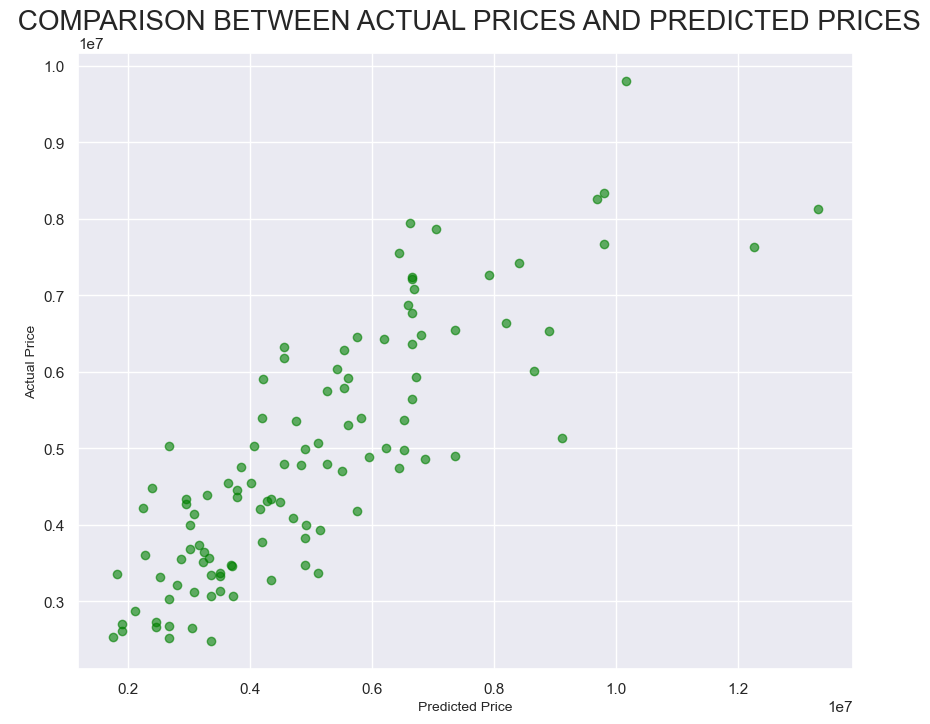

In [51]:
plt.figure(figsize=(10,8))
sns.set(style='darkgrid')
plt.scatter(y2_test, y2_predict, color= 'green', alpha= 0.6)
plt.xlabel("Predicted Price", fontsize= 10)
plt.ylabel("Actual Price", fontsize= 10)
plt.title(" COMPARISON BETWEEN ACTUAL PRICES AND PREDICTED PRICES", fontsize= 20)
plt.show()